<a href="https://colab.research.google.com/github/Happymana3/LEARN/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [4]:
!unzip /content/goldprice.zip

Archive:  /content/goldprice.zip
  inflating: gld_price_data.csv      


In [14]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


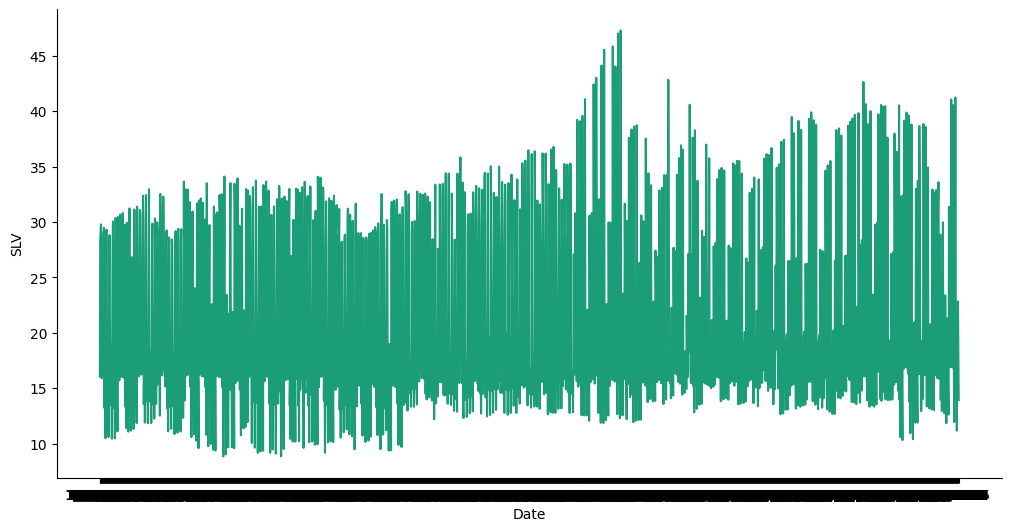

In [15]:
# @title Date vs SLV

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['SLV']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = gold_data.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('SLV')

In [9]:
gold_data=pd.read_csv("/content/goldprice.zip")

In [13]:
gold_data.shape

(2290, 6)

In [12]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [11]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [18]:
gold_data.drop(columns="Date", inplace = True)

In [19]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [20]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [22]:
"""Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically.

Data table display for Pandas dataframes can be enabled by running:

from google.colab import data_table
data_table.enable_dataframe_formatter()
and disabled by running

from google.colab import data_table
data_table.disable_dataframe_formatter()  """

'Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically.\n\nData table display for Pandas dataframes can be enabled by running:\n\nfrom google.colab import data_table\ndata_table.enable_dataframe_formatter()\nand disabled by running\n\nfrom google.colab import data_table\ndata_table.disable_dataframe_formatter()  '

In [23]:
correlation = gold_data.corr()

In [24]:
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

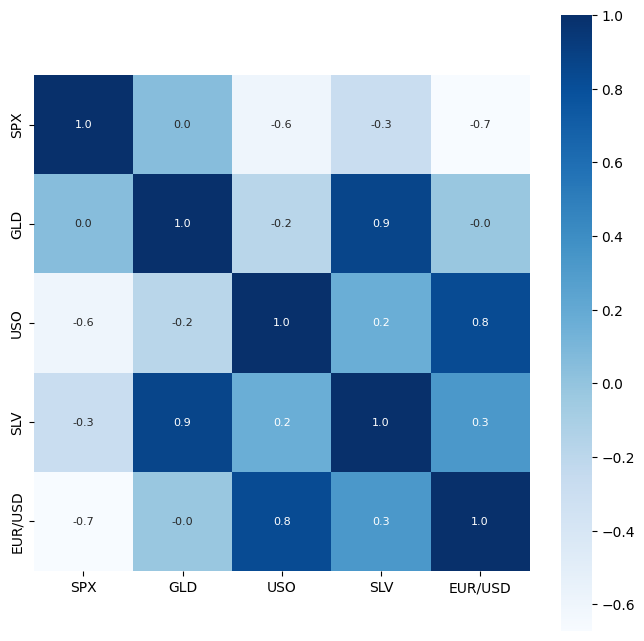

In [25]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [26]:
X = gold_data.drop(['EUR/USD'],axis=1)
Y = gold_data['EUR/USD']

In [27]:
X

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.1800
1,1447.160034,85.570000,78.370003,15.2850
2,1411.630005,85.129997,77.309998,15.1670
3,1416.180054,84.769997,75.500000,15.0530
4,1390.189941,86.779999,76.059998,15.5900
...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100
2286,2697.790039,124.330002,14.370000,15.5300
2287,2723.070068,125.180000,14.410000,15.7400
2288,2730.129883,124.489998,14.380000,15.5600


In [28]:
Y

,EUR/USD
0,1.471692
1,1.474491
2,1.475492
3,1.468299
4,1.557099
...,...
2285,1.186789
2286,1.184722
2287,1.191753
2288,1.193118


In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [30]:
regressor = RandomForestRegressor(n_estimators=100)

In [31]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [32]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [33]:
test_data_prediction

array([1.3171207 , 1.46422185, 1.10621661, 1.12580438, 1.0669162 ,
       1.22128189, 1.43212398, 1.19458567, 1.26889536, 1.3496334 ,
       1.24891804, 1.41925291, 1.31088375, 1.31373302, 1.12274333,
       1.0949585 , 1.35918012, 1.29067335, 1.31355843, 1.37434839,
       1.29255375, 1.32037399, 1.4198483 , 1.42549582, 1.20748191,
       1.4270256 , 1.40787695, 1.3652416 , 1.27527848, 1.27505519,
       1.32331563, 1.22494791, 1.5838592 , 1.11042348, 1.23547939,
       1.32193142, 1.12197144, 1.12924792, 1.33466422, 1.10198891,
       1.37877768, 1.55662276, 1.23471593, 1.41837358, 1.29299593,
       1.36058004, 1.12364916, 1.11811518, 1.57591575, 1.35010076,
       1.25786017, 1.14054006, 1.10370957, 1.11224698, 1.15874374,
       1.32663748, 1.34046203, 1.42185226, 1.45697579, 1.53605558,
       1.53650528, 1.54971815, 1.29750965, 1.17836561, 1.2340284 ,
       1.36850393, 1.33348902, 1.18296581, 1.26342782, 1.45844412,
       1.33923461, 1.42954857, 1.37976066, 1.24926508, 1.32840

In [38]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9828264707821628


In [36]:
regressor = RandomForestRegressor(n_estimators=95)

In [39]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9828264707821628


In [37]:
Y_test = list(Y_test)

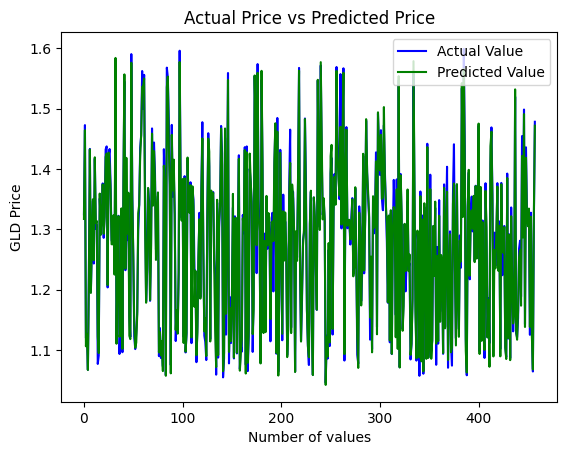

In [40]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()